# TS Forecasting with LSTM

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from keras.models import Sequential
from keras.layers import Dense, LSTM

Using TensorFlow backend.


In [2]:
data = pd.read_csv('zuerich-monthly-sunspot-numbers.csv')

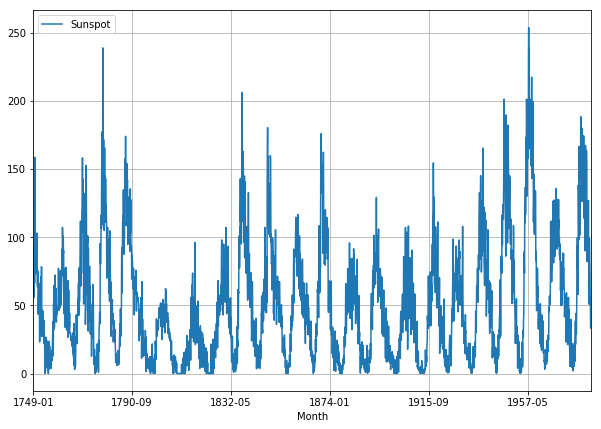

In [3]:
data.plot(x='Month', y='Sunspot', figsize=(10, 7))
plt.grid(True)

In [4]:
def to_normalize(data):
    mini = min(data)
    maxi = max(data)
    return (data - mini) / (maxi - mini)

In [5]:
def organize_data(series, lag):
    X, y = [],[]
    for i in range(len(series)):
        if (i + lag > len(series) - 1): break
        xi, yi = series[i:i+lag], series[i+lag]
        X.append(xi)
        y.append(yi)
    return X, y

In [6]:
def split_data(X, y, train_size):
    x_train = X[:int(len(X)*train_size)]
    x_test = X[int(len(X)*train_size):]
    y_train = y[:int(len(X)*train_size)]
    y_test = y[int(len(X)*train_size):]
    return x_train, x_test, y_train, y_test

In [7]:
def MAPE(y_test, predict):
    soma = 0
    for i in range(len(y_test)):
        soma += abs((y_test[i] - predict[i])/y_test[i])*100
    media_erro = soma/len(y_test)
    return media_erro.round(5)

In [8]:
data = data.dropna()

In [9]:
lag = 12

In [11]:
data = to_normalize(data['Sunspot'])
data = data + 1

In [12]:
X, y = organize_data(data, lag)

In [13]:
X_train, X_test, y_train, y_test = split_data(X, y, train_size=0.3)
X_train = np.reshape(X_train, (len(X_train), 1, len(X_train[0])))
X_test = np.reshape(X_test, (len(X_test), 1, len(X_test[0])))

In [14]:
model = Sequential()
model.add(LSTM(10, input_shape=(1, lag)))
model.add(Dense(1))

In [15]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [16]:
model.fit(X_train, y_train, epochs=10, batch_size=1, verbose=0)

In [17]:
pred = model.predict(X_test)

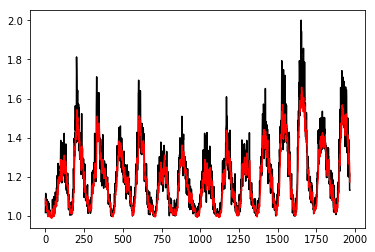

In [18]:
plt.plot(y_test, 'k')
plt.plot(pred, 'r')

In [19]:
MAPE(y_test, pred)

array([3.95994], dtype=float32)

In [20]:
def MAE(y_test, predict):
    soma = 0
    for i in range(len(y_test)):
        soma += abs((y_test[i] - predict[i]))
    media_erro = soma/len(y_test)
    return media_erro.round(5)

In [21]:
MAE(y_test, pred)

array([0.05137], dtype=float32)